In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('gurgaon_properties_fe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3803 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedrooms             3803 non-null   int64  
 8   bathrooms            3803 non-null   int64  
 9   balconies            3803 non-null   object 
 10  floor_num            3784 non-null   float64
 11  facing               2698 non-null   object 
 12  age_possession       3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [23]:
df.duplicated().sum()

126

In [24]:
df.drop_duplicates(inplace=True)
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,2.50,13600.0,1838.0,Super Built up area 1828(169.83 sq.m.),3,3,3,...,1828.0,NaN,NaN,0,0,0,0,0,0,48
1,flat,bestech park view city,sector 48,2.65,10323.0,2567.0,Super Built up area 2567(238.48 sq.m.)Carpet a...,4,4,3+,...,2567.0,NaN,1750.0,1,1,0,0,0,1,174
2,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2,2,3,...,1640.0,1300.0,1000.0,0,0,0,0,0,1,174
3,flat,signature global solera,sector 107,0.52,8062.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,...,NaN,NaN,645.0,0,0,0,0,1,0,15
4,flat,signature global park,sohna road,0.54,7248.0,745.0,Carpet area: 745 (69.21 sq.m.),2,1,3,...,NaN,NaN,745.0,0,0,0,0,0,0,65


In [25]:
df.shape

(3677, 23)

### 1. Property type

<AxesSubplot:>

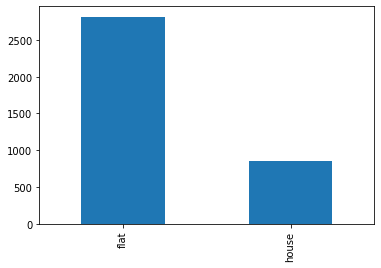

In [26]:
df['property_type'].value_counts().plot(kind='bar')

- Flats are in majority (~75%)
- No missing values

In [27]:
df['society'].value_counts().shape

(675,)

In [29]:
df['society'].value_counts()[:20]

independent                             487
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
signature global park                    35
shree vardhman victoria                  34
smart world orchard                      32
emaar mgf emerald floors premier         32
paras dews                               31
dlf the ultima                           31
m3m woodshire                            30
dlf regal gardens                        30
shree vardhman flora                     29
smart world gems                         28
la vida by tata housing                  28
godrej nature plus                       27
signature global solera                  27
bptp terra                               25
vatika gurgaon                           24
Name: society, dtype: int64

In [38]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(74)

tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
dlf the primus                          0.486520
indiabulls enigma                       0.490596
ramsons kshitij                         0.494671
the close north                         0.498746
ireo the corridors                      0.502508
Name: society, Length: 74, dtype: float64

In [44]:
society_counts = df['society'].value_counts()

frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts >= 2) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 307}

<AxesSubplot:>

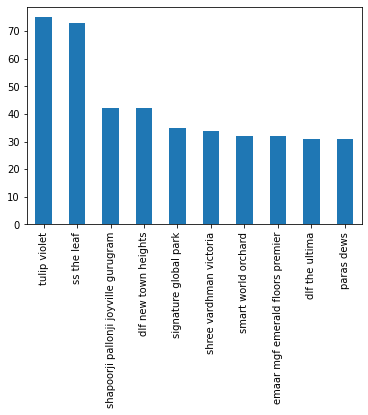

In [36]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [37]:
df['society'].isnull().sum()

0

- Around 13% of the properties are independent
- There are a total of 674 societies in the dataset
- The top 74 societies have 50% of all properties and the rest 600 have the remaining 50% properties.
    - Very High (>100): 1 society has more than 100 properties
    - High (50-100): 2 societies have between 50 t0 100 properties
    - Average (10-49): 92 societies have between 10 to 49 properties
    - Low (2-9): 273 societies have between 2 to 9 properties
    - Very Low (1): This is largest group; 307 societies have 1 property each


### 3. Sector

In [41]:
df['sector'].value_counts()

sohna road    166
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 73       3
sector 17b      3
sector 88b      3
sector 27       3
sector 37       1
Name: sector, Length: 112, dtype: int64

In [42]:
df['sector'].isnull().sum()

0

In [47]:
sector_counts = df['sector'].value_counts()

frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts >= 2) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 62,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

<AxesSubplot:>

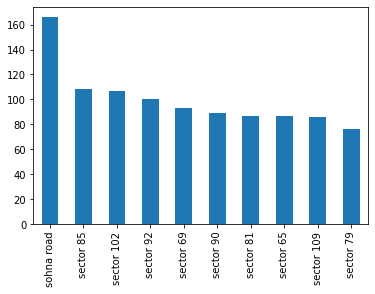

In [46]:
df['sector'].value_counts().head(10).plot(kind='bar')

- There are a total of 112 sectors in the dataset
- Frequency distribution:
    - Very High (>100): 3 sectors have more than 100 properties
    - High (50-100): 25 sectors have between 50 to 100 properties
    - Average (10-49): 62 sectors have between 10 to 49 properties
    - Low (2-9): 21 sectors have between 2 to 9 properties
    - Very Low (1): 1 sector has 1 property